#Exercise: Building a Fully Connected Network (FCN) for
#Devnagari Digit Classification.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Task 1: Data Preparation

Training set: (17010, 784), Labels: (17010, 10)
Testing set: (3000, 784), Labels: (3000, 10)


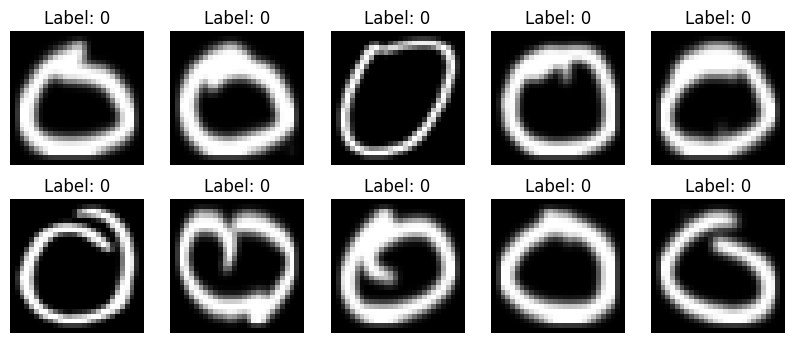

In [79]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image

# Set the paths for training and testing datasets
train_dir = "/content/drive/MyDrive/AI and ML/Week 4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI and ML/Week 4/DevanagariHandwrittenDigitDataset/Test"

# Define the dimensions for the images
img_height, img_width = 28, 28

# Function to load images and labels from a given folder
def load_images_from_folder(folder):
    images = []
    labels = []

    # Get the class names (e.g., digit_0, digit_1, ..., digit_9) and sort them
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}  # Assign a unique label to each class

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]  # Get the numerical label for this class

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Open the image, convert it to grayscale, and resize it to (28, 28)
            img = Image.open(img_path).convert("L")
            img = img.resize((img_width, img_height))

            # Convert the image to a NumPy array and normalize pixel values to the range [0,1]
            img = np.array(img) / 255.0

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load images and labels for both training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape the images to be compatible with Keras input format
x_train = x_train.reshape(-1, img_height * img_width)
x_test = x_test.reshape(-1, img_height * img_width)

# Convert labels to one-hot encoding for classification
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Display the shape of the datasets to verify everything is loaded correctly
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some sample images from the training set
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Reshape back to 2D for display
    plt.title(f"Label: {np.argmax(y_train[i])}")  # Show the corresponding label
    plt.axis("off")
plt.show()

##Task 2: Build the FCN Model


###Using Sequencial API

In [245]:
import tensorflow as tf

# Create a Sequential model
sequential_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="sigmoid", input_shape=(img_height * img_width,)),  # 1st hidden layer
    tf.keras.layers.Dense(128, activation="sigmoid"),  # 2nd hidden layer
    tf.keras.layers.Dense(256, activation="sigmoid"),  # 3rd hidden layer
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer
])

# Print model summary
print("\n--- Sequential Model Summary ---")
sequential_model.summary()


--- Sequential Model Summary ---


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_164 (Dense)                    │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

###Using Functional API

In [246]:
import tensorflow as tf

# Define the Functional API model
inputs = tf.keras.Input(shape=(img_height * img_width,))  # Input layer
x = tf.keras.layers.Dense(64, activation="sigmoid")(inputs)  # 1st hidden layer
x = tf.keras.layers.Dense(128, activation="sigmoid")(x)  # 2nd hidden layer
x = tf.keras.layers.Dense(256, activation="sigmoid")(x)  # 3rd hidden layer
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)  # Output layer

functional_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print model summary
print("\n--- Functional Model Summary ---")
functional_model.summary()


--- Functional Model Summary ---


Model: "functional_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_42 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

##Task 3: Compile the Model


###Sequencial

In [247]:
# Compile the Sequential model
sequential_model.compile(
    optimizer="adam",  # Optimizer
    loss="categorical_crossentropy",  # Loss function
    metrics=["accuracy"]  # Evaluation metric
)

###Functional

In [248]:
# Compile the Functional model
functional_model.compile(
    optimizer="adam",  # Optimizer
    loss="categorical_crossentropy",  # Loss function
    metrics=["accuracy"]  # Evaluation metric
)

##Task 4: Train both Models


In [249]:
import tensorflow as tf
batch_size = 128
epochs = 2000

# Define callbacks for training
callbacks = [
    # Save the best model during training based on validation loss
    tf.keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]

#### Train the Sequential model

In [250]:
print("\n--- Training Sequential Model ---")

history_sequential = sequential_model.fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=0.15,  # Use 15% of training data for validation
    callbacks = callbacks
)


--- Training Sequential Model ---
Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2741 - loss: 1.9967 - val_accuracy: 0.0357 - val_loss: 6.0760
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7551 - loss: 0.7410 - val_accuracy: 0.2567 - val_loss: 6.5261
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8824 - loss: 0.3579 - val_accuracy: 0.2892 - val_loss: 7.0644
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9382 - loss: 0.2269 - val_accuracy: 0.2747 - val_loss: 7.1854
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9573 - loss: 0.1579 - val_accuracy: 0.2614 - val_loss: 7.4215


####Train the Functional model

In [251]:
print("\n--- Training Functional Model ---")
history_functional = functional_model.fit(
     x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=0.15,  # Use 15% of training data for validation
    callbacks = callbacks
)


--- Training Functional Model ---
Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2772 - loss: 2.0183 - val_accuracy: 0.0568 - val_loss: 5.5205
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7884 - loss: 0.6961 - val_accuracy: 0.1270 - val_loss: 6.4893
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8760 - loss: 0.3569 - val_accuracy: 0.2226 - val_loss: 6.5346
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9292 - loss: 0.2350 - val_accuracy: 0.2520 - val_loss: 6.8449
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9553 - loss: 0.1627 - val_accuracy: 0.2719 - val_loss: 6.8288


##Task 5: Evaluate both Models


In [252]:
# Evaluate the Sequential model on the test set
print("\n--- Evaluating Sequential Model ---")
test_loss_seq, test_acc_seq = sequential_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy (Sequential): {test_acc_seq:.4f}")

# Evaluate the Functional model on the test set
print("\n--- Evaluating Functional Model ---")
test_loss_func, test_acc_func = functional_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy (Functional): {test_acc_func:.4f}")


--- Evaluating Sequential Model ---
94/94 - 0s - 2ms/step - accuracy: 0.8520 - loss: 1.2438
Test Accuracy (Sequential): 0.8520

--- Evaluating Functional Model ---
94/94 - 0s - 2ms/step - accuracy: 0.8507 - loss: 1.1534
Test Accuracy (Functional): 0.8507


##Task 6: Save and Load both Models


In [253]:
import tensorflow as tf

# Save the trained models
sequential_model.save("sequential_fcn_model.h5")
functional_model.save("functional_fcn_model.h5")

# Load the saved models
loaded_sequential_model = tf.keras.models.load_model("sequential_fcn_model.h5")
loaded_functional_model = tf.keras.models.load_model("functional_fcn_model.h5")

# Re-evaluate the loaded Sequential model
loaded_test_loss_seq, loaded_test_acc_seq = loaded_sequential_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded Sequential Model Test Accuracy: {loaded_test_acc_seq:.4f}")

# Re-evaluate the loaded Functional model
loaded_test_loss_func, loaded_test_acc_func = loaded_functional_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded Functional Model Test Accuracy: {loaded_test_acc_func:.4f}")

94/94 - 0s - 5ms/step - accuracy: 0.8520 - loss: 1.2438
Loaded Sequential Model Test Accuracy: 0.8520
94/94 - 0s - 5ms/step - accuracy: 0.8507 - loss: 1.1534
Loaded Functional Model Test Accuracy: 0.8507


##Task 7: Predictions


In [254]:
# Make predictions using the Sequential model
predictions_seq = loaded_sequential_model.predict(x_test)
predicted_labels_seq = np.argmax(predictions_seq, axis=1)

# Make predictions using the Functional model
predictions_func = loaded_functional_model.predict(x_test)
predicted_labels_func = np.argmax(predictions_func, axis=1)

# Display predictions for the first 10 test images
print("\n--- Sequential Model Predictions ---")
for i in range(10):
    print(f"Predicted label for image {i}: {predicted_labels_seq[i]}")
    print(f"True label for image {i}: {np.argmax(y_test[i])}")

print("\n--- Functional Model Predictions ---")
for i in range(10):
    print(f"Predicted label for image {i}: {predicted_labels_func[i]}")
    print(f"True label for image {i}: {np.argmax(y_test[i])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

--- Sequential Model Predictions ---
Predicted label for image 0: 0
True label for image 0: 0
Predicted label for image 1: 0
True label for image 1: 0
Predicted label for image 2: 0
True label for image 2: 0
Predicted label for image 3: 0
True label for image 3: 0
Predicted label for image 4: 0
True label for image 4: 0
Predicted label for image 5: 0
True label for image 5: 0
Predicted label for image 6: 0
True label for image 6: 0
Predicted label for image 7: 0
True label for image 7: 0
Predicted label for image 8: 0
True label for image 8: 0
Predicted label for image 9: 0
True label for image 9: 0

--- Functional Model Predictions ---
Predicted label for image 0: 0
True label for image 0: 0
Predicted label for image 1: 0
True label for image 1: 0
Predicted label for image 2: 0
True label for image 2: 0
Predicted label for image 3: 0
True label for image 3: 0
Predicted label for image 4: 0
True label for im

##Visualization

####For Sequencial

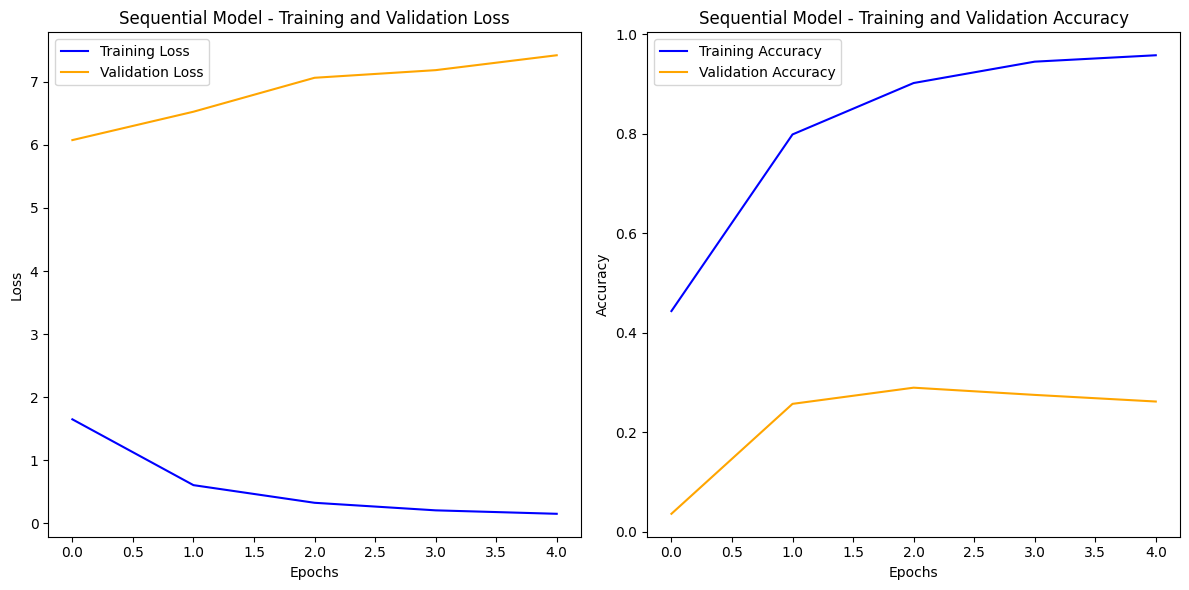

In [255]:
# Plot training and validation loss for Sequential model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_sequential.history['loss'], label='Training Loss', color='blue')
plt.plot(history_sequential.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Sequential Model - Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy for Sequential model
plt.subplot(1, 2, 2)
plt.plot(history_sequential.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_sequential.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Sequential Model - Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###For Functional

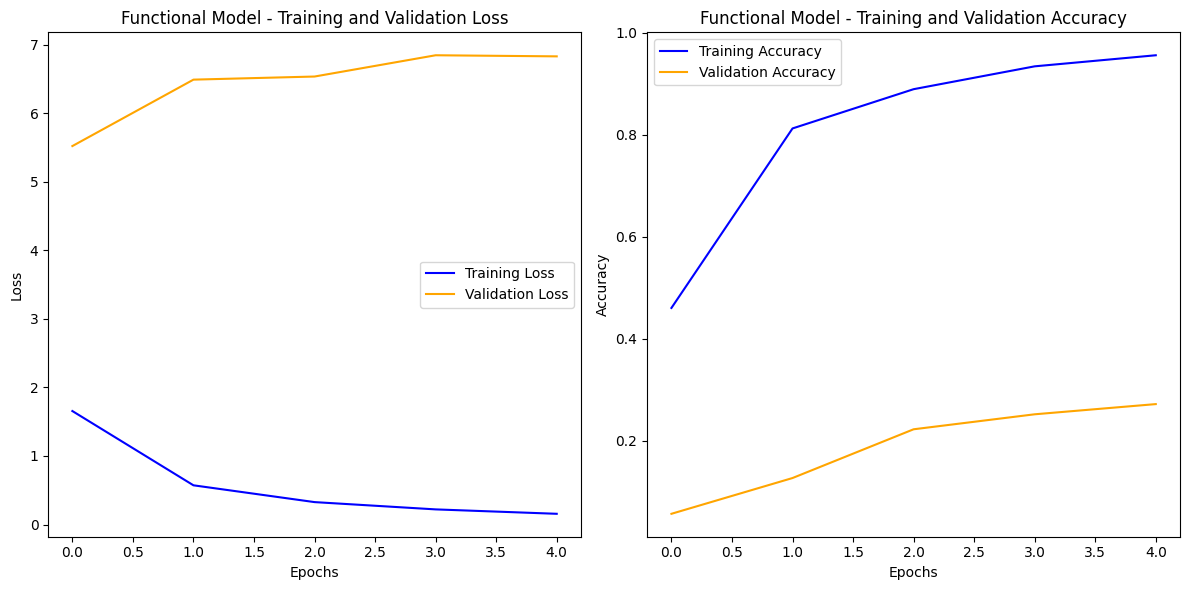

In [256]:
# Plot training and validation loss for Functional model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_functional.history['loss'], label='Training Loss', color='blue')
plt.plot(history_functional.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Functional Model - Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy for Functional model
plt.subplot(1, 2, 2)
plt.plot(history_functional.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_functional.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Functional Model - Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()